In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
zomdf=pd.read_csv('zomato.csv')
zomdf.head(10)


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
5,18189371,Din Tai Fung,162,Mandaluyong City,"Ground Floor, Mega Fashion Hall, SM Megamall, ...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056314,14.583764,Chinese,...,Botswana Pula(P),No,No,No,No,3,4.4,Green,Very Good,336
6,6300781,Buffet 101,162,Pasay City,"Building K, SM By The Bay, Sunset Boulevard, M...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979667,14.531333,"Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.0,Green,Very Good,520
7,6301290,Vikings,162,Pasay City,"Building B, By The Bay, Seaside Boulevard, Mal...","SM by the Bay, Mall of Asia Complex, Pasay City","SM by the Bay, Mall of Asia Complex, Pasay Cit...",120.979333,14.540000,"Seafood, Filipino, Asian, European",...,Botswana Pula(P),Yes,No,No,No,4,4.2,Green,Very Good,677
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.9,Dark Green,Excellent,621
9,6314987,Locavore,162,Pasig City,"Brixton Technology Center, 10 Brixton Street, ...",Kapitolyo,"Kapitolyo, Pasig City",121.056532,14.572041,Filipino,...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,532


In [6]:
print(zomdf.columns)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')


## · Exploratory Analysis and Visualization
∘ List of countries the survey is spread across
· Understanding the Rating aggregate, color and text
∘ Country and Currency
∘ Online delivery distribution
∘ Let us try to understand the coverage of city
· Asking and Answering Questions
· Q1: From which Locality maximum hotels are listed in Zomato
∘ Q2: What kind of Cuisine these highly rates restaurants offer
∘ Q3: How many of such restaurants accept online delivery
∘ Q4: Understanding the Restaurants Rating localities.
∘ Q5: Rating VS Cost of dinning
∘ Q6: Location of Highly rated restaurants across New Delhi
· Q7: Common Eateries
∘ 1: Breakfast and Coffee locations
∘ 2: Fast Food Restaurants
∘ 3: Ice Cream Parlors
· Inferences and Conclusions

In [21]:
countrydf=pd.read_excel('Country-Code.xlsx')
countrydf

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia
5,148,New Zealand
6,162,Phillipines
7,166,Qatar
8,184,Singapore
9,189,South Africa


In [24]:
zomdf=pd.merge(left = zomdf, right = countrydf, how = 'left')
zomdf.tail()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey
9550,5927402,Walter's Coffee Roastery,208,��stanbul,"Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...",Moda,"Moda, ��stanbul",29.026016,40.984776,Cafe,...,No,No,No,No,2,4.0,Green,Very Good,591,Turkey


## Count of country names

In [50]:
country_count=zomdf['Country'].value_counts()
df1 = pd.DataFrame(data=country_count.index, columns=['Country'])
df2 = pd.DataFrame(data=country_count.values, columns=['Country names'])
country_count= pd.merge(df1, df2, left_index=True, right_index=True)
country_count

,Country,Country names
0,India,8652
1,United States,434
2,United Kingdom,80
3,UAE,60
4,South Africa,60
5,Brazil,60
6,New Zealand,40
7,Turkey,34
8,Australia,24
9,Phillipines,22


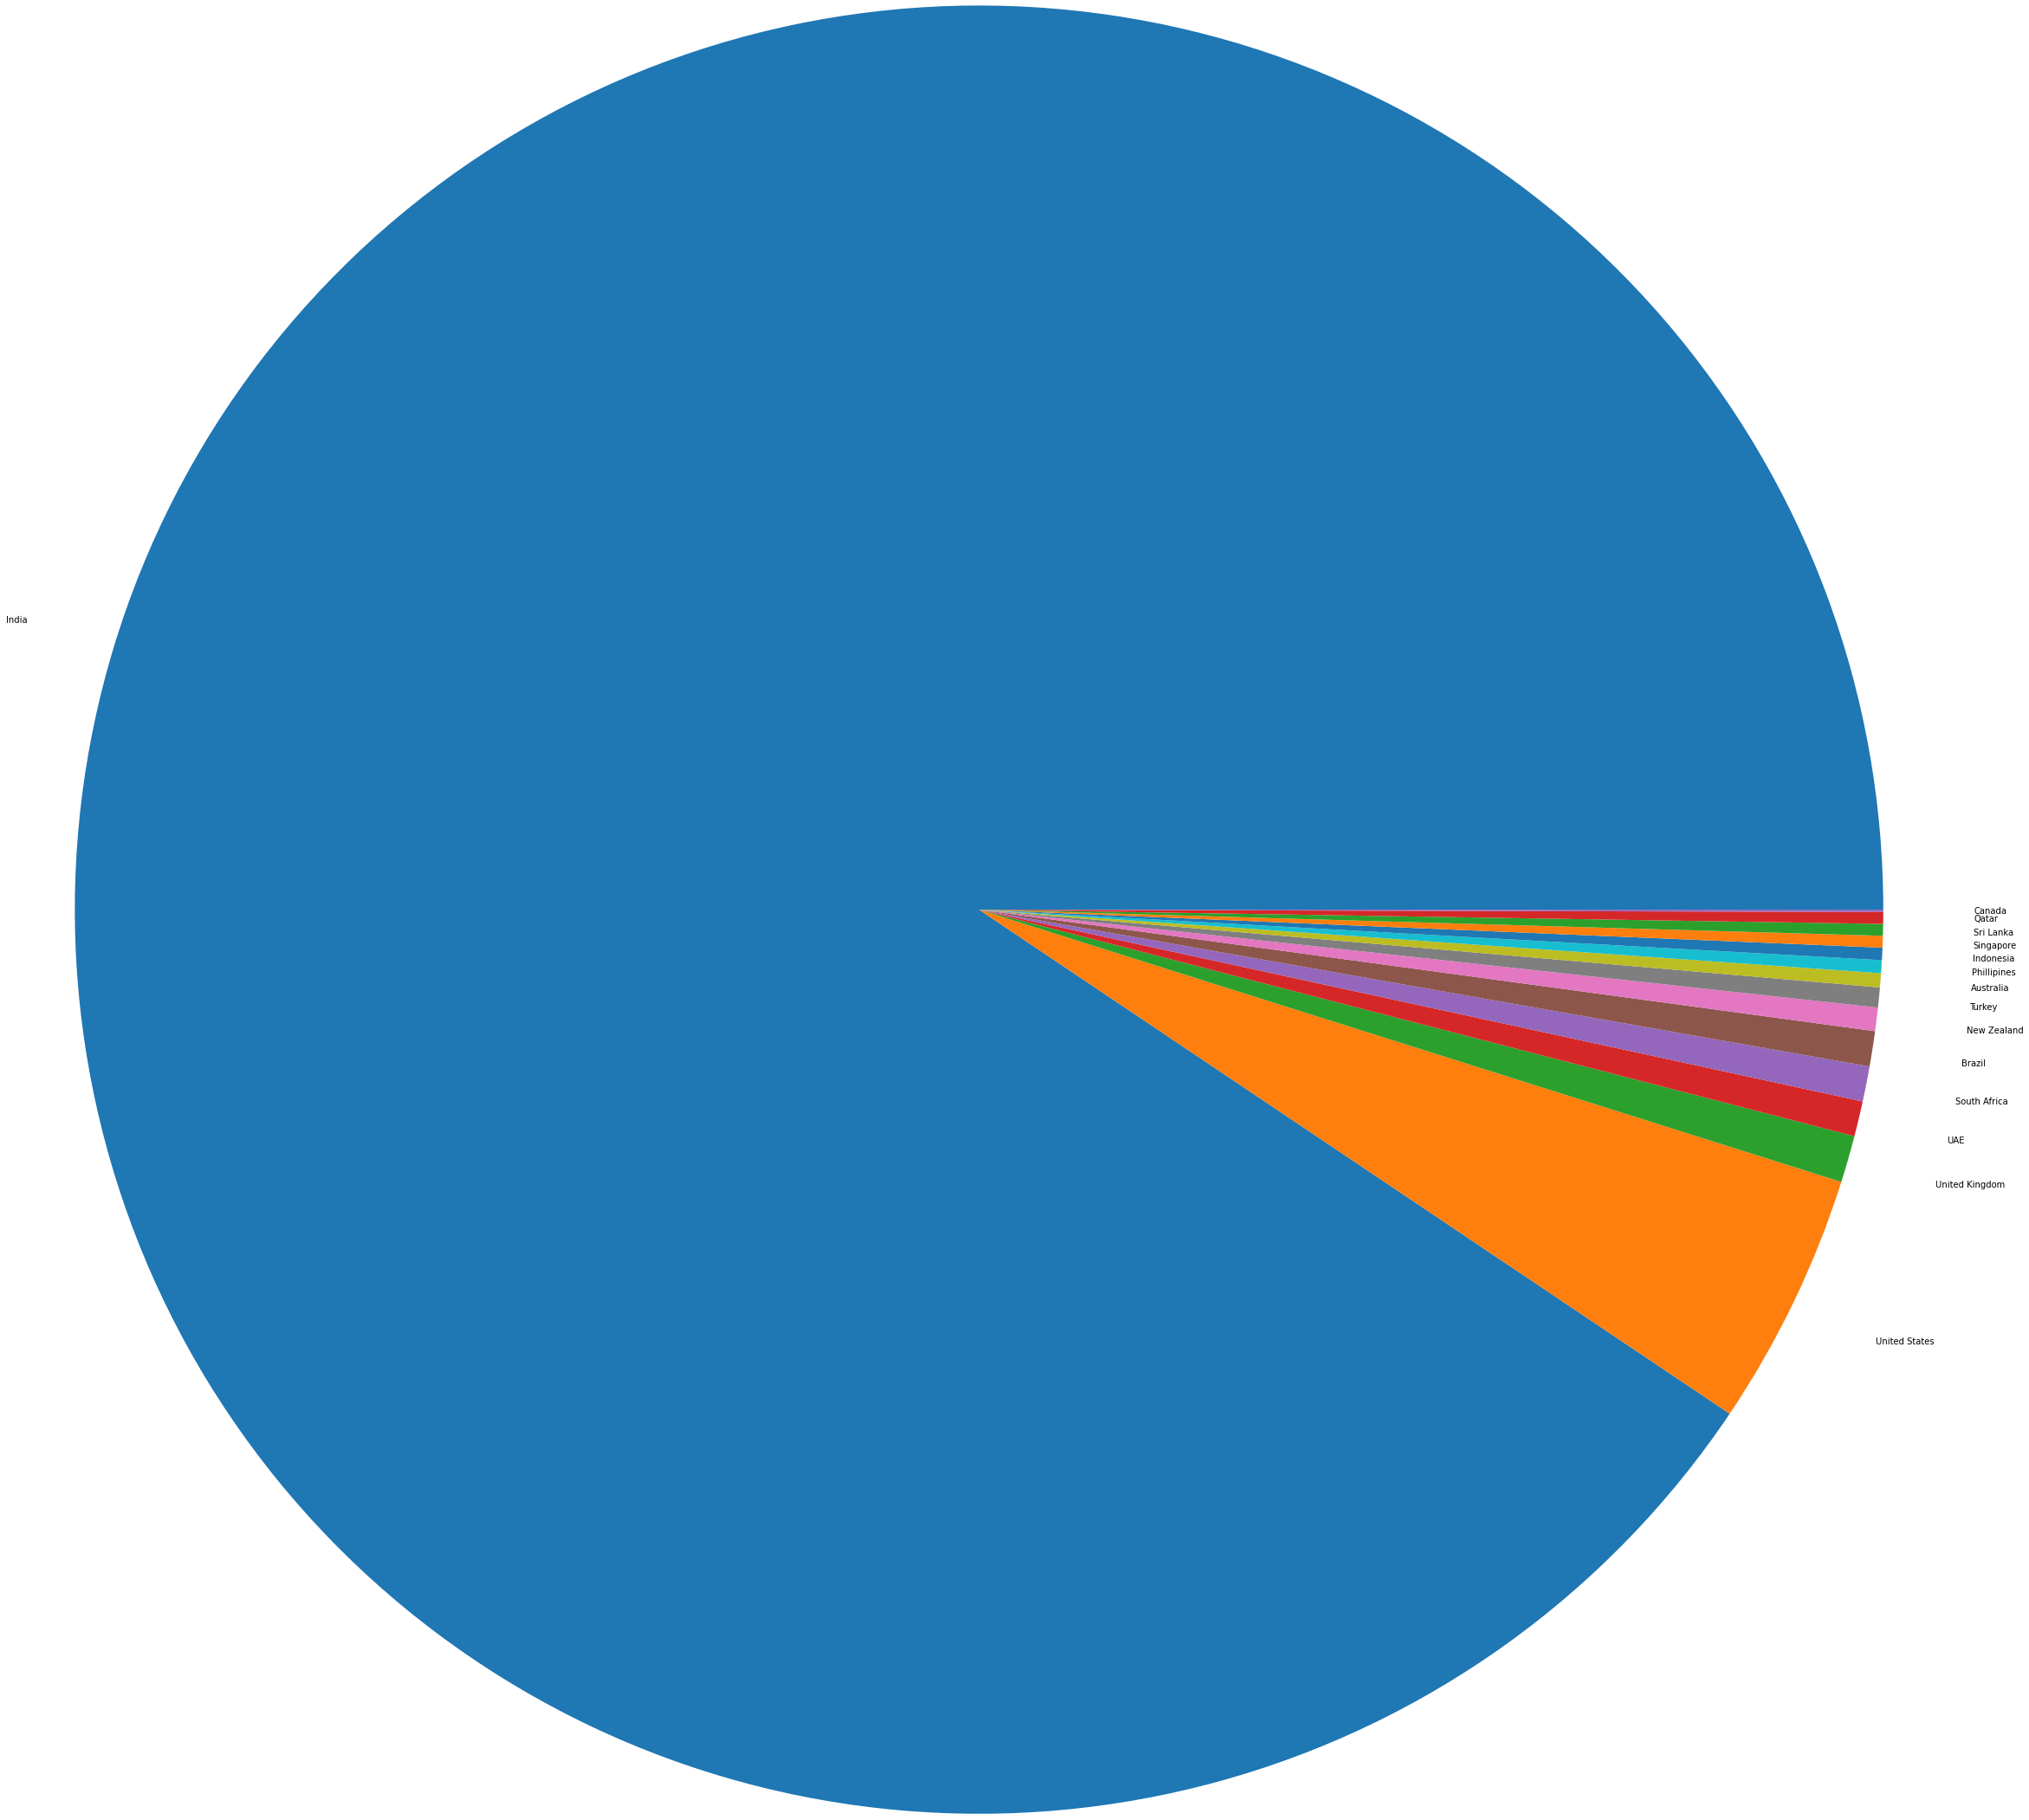

In [54]:
y=country_count['Country names']
mylabels =country_count['Country']

plt.pie(y, labels = mylabels,radius=12)
plt.show() 

## Aggregate rating of Restaurants

In [56]:
Aggregate_rating=zomdf['Aggregate rating'].value_counts()
Aggregate_rating

0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: Aggregate rating, dtype: int64

In [57]:
Aggregate_rating=zomdf['Aggregate rating'].value_counts()
df1 = pd.DataFrame(data=Aggregate_rating.index, columns=['Rating'])
df2 = pd.DataFrame(data=Aggregate_rating.values, columns=['Count of that rating'])
Aggregate_rating= pd.merge(df1, df2, left_index=True, right_index=True)
Aggregate_rating

,Rating,Count of that rating
0,0.0,2148
1,3.2,522
2,3.1,519
3,3.4,498
4,3.3,483
5,3.5,480
6,3.0,468
7,3.6,458
8,3.7,427
9,3.8,400


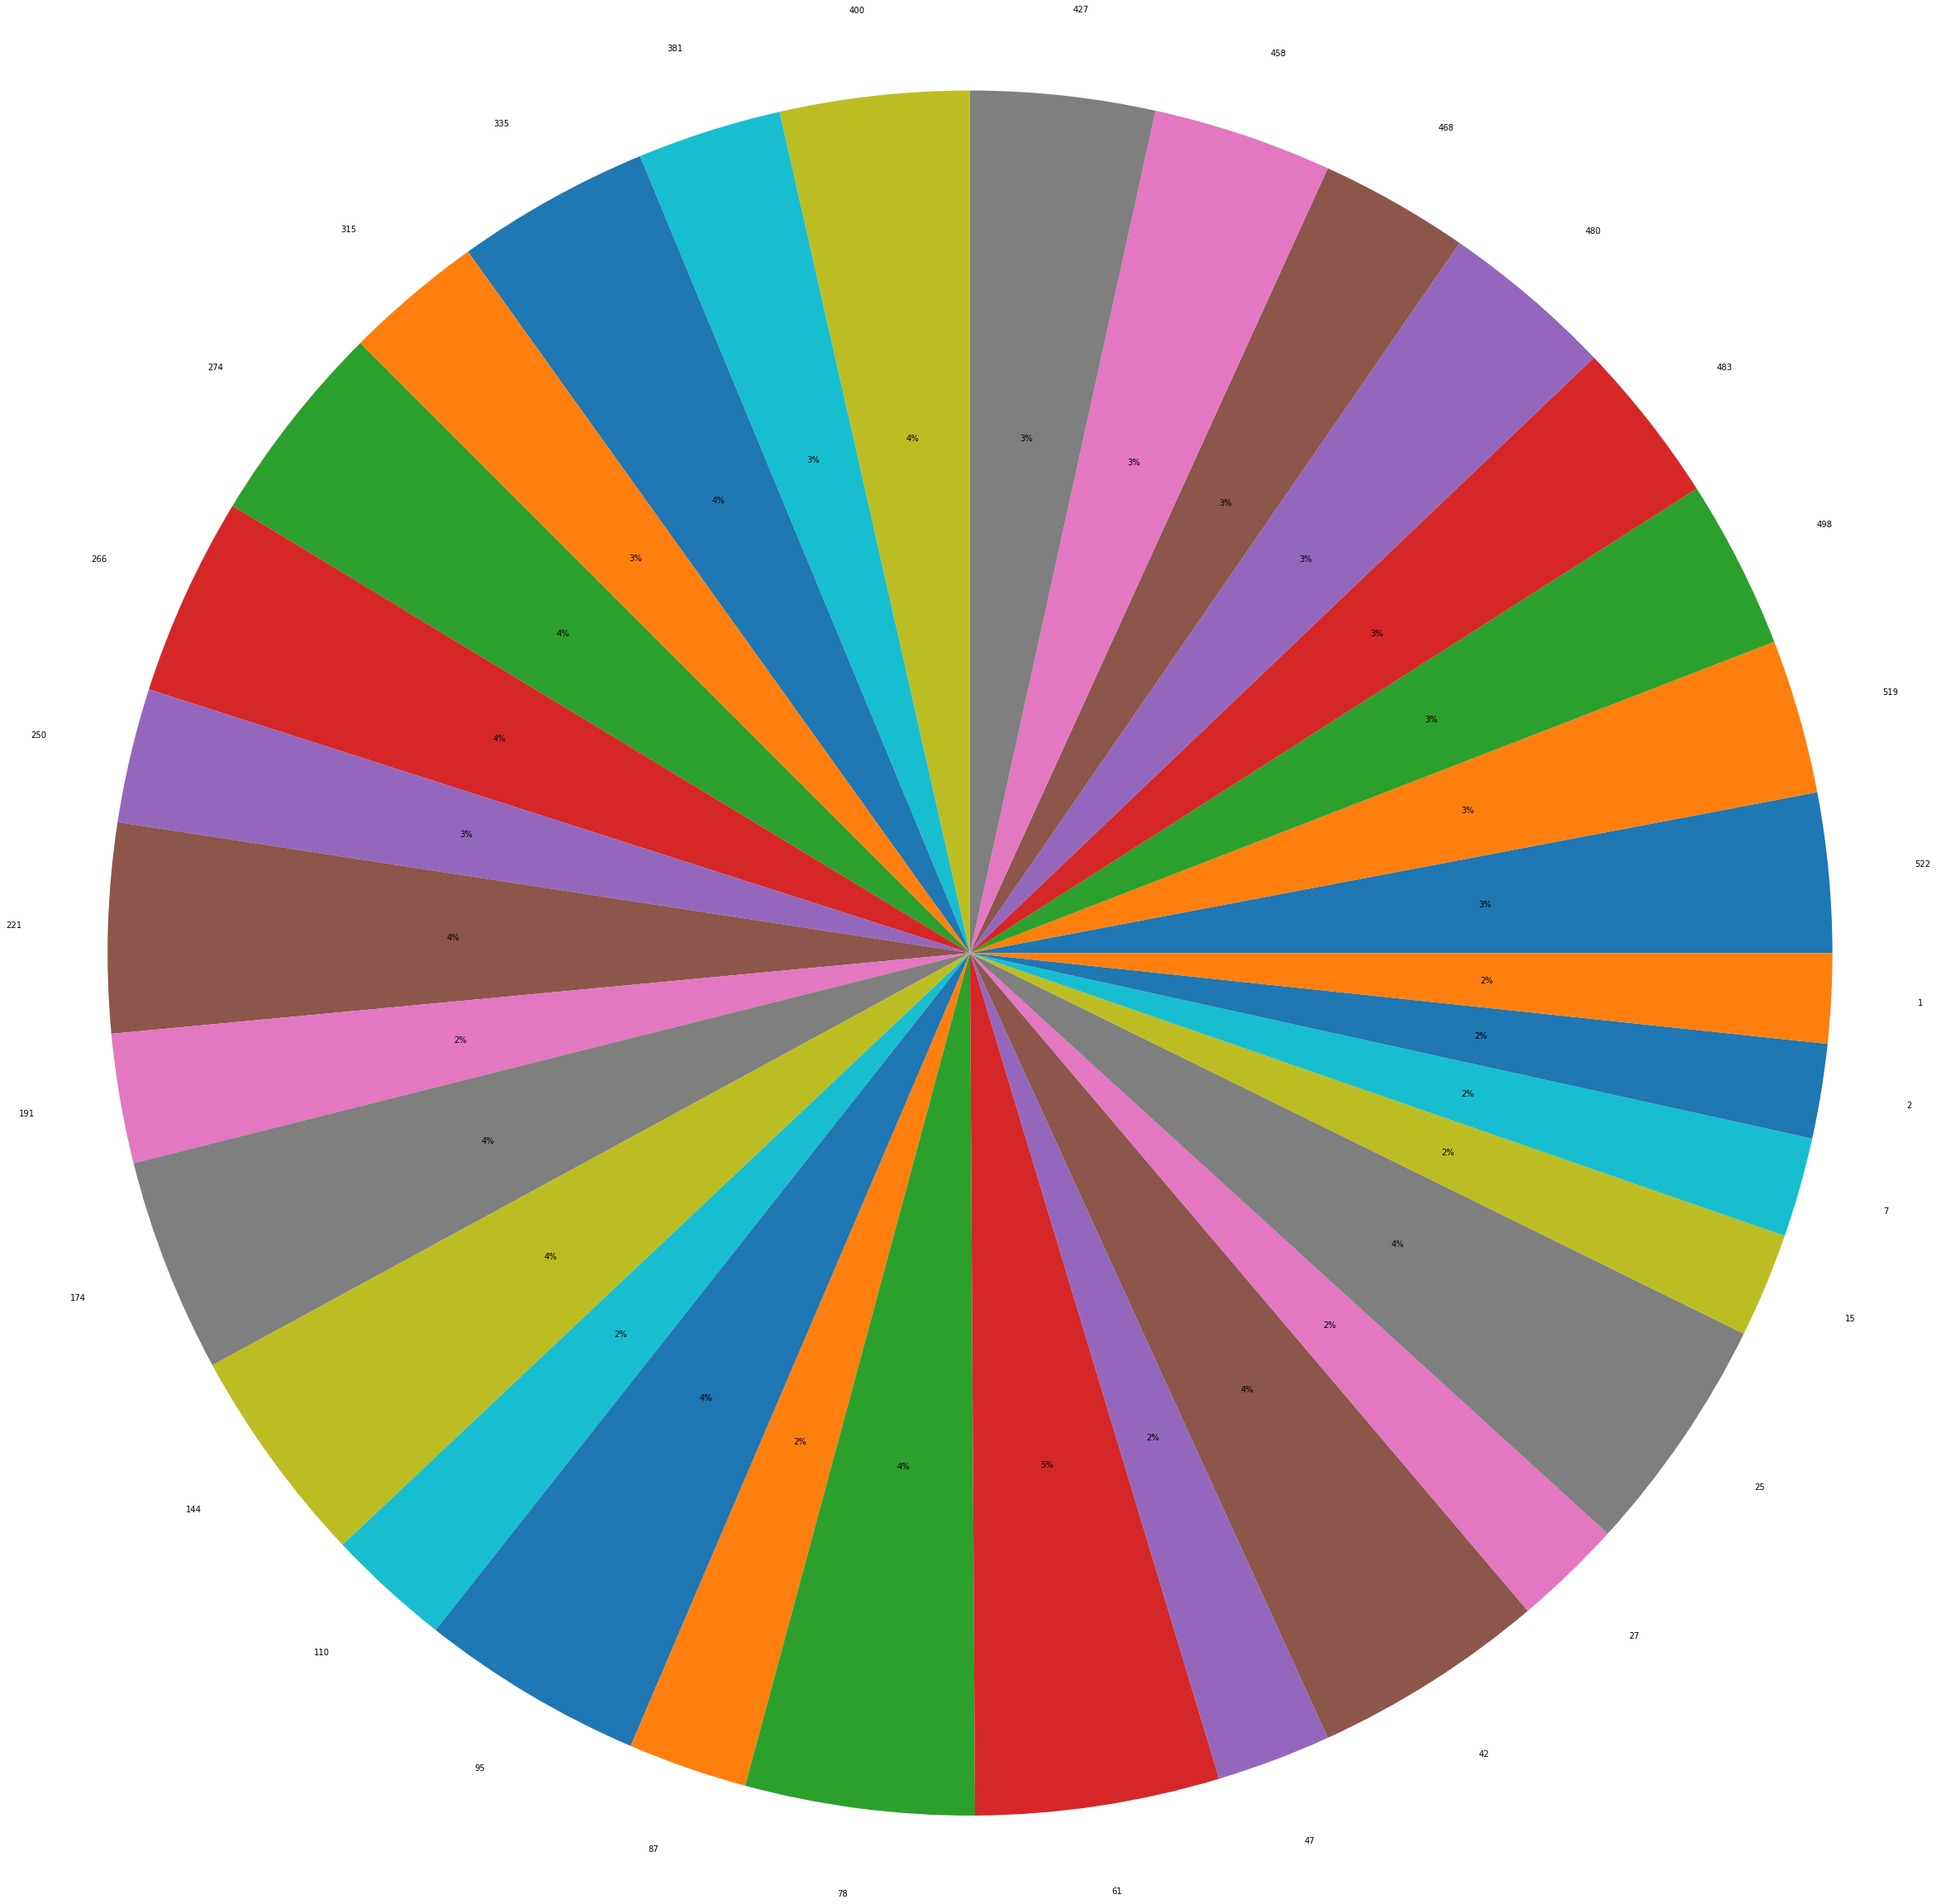

In [67]:
# Aggregate_rating= Aggregate_rating.drop(0)
# Aggregate_rating
y=Aggregate_rating['Rating']
mylabels =Aggregate_rating['Count of that rating']

plt.pie(y, labels = mylabels,radius=12, autopct='%1.0f%%')
plt.show() 
# df.plot.bar(x, mylabels, rot=0)

In [65]:
Aggregate_rating

,Rating,Count of that rating
1,3.2,522
2,3.1,519
3,3.4,498
4,3.3,483
5,3.5,480
6,3.0,468
7,3.6,458
8,3.7,427
9,3.8,400
10,2.9,381


## Countries and their currency

In [81]:
a1=zomdf['Country']
a2=zomdf['Currency']
country_currency=pd.merge(left=a1,right=a2,left_index=True, right_index=True)
country_currency.head()

,Country,Currency
0,Phillipines,Botswana Pula(P)
1,Phillipines,Botswana Pula(P)
2,Phillipines,Botswana Pula(P)
3,Phillipines,Botswana Pula(P)
4,Phillipines,Botswana Pula(P)


## If restaurant has online deliveries or not

In [92]:
b1=zomdf['Restaurant Name']
b2=zomdf['Has Online delivery']
Onl_deli=pd.merge(left=b1,right=b2,left_index=True, right_index=True)
print(Onl_deli['Has Online delivery'].value_counts())
(Onl_deli.loc[Onl_deli['Has Online delivery'] == 'Yes'])


No     7100
Yes    2451
Name: Has Online delivery, dtype: int64


,Restaurant Name,Has Online delivery
565,Famous Dave's Barbecue,Yes
566,Pizza Di Rocco,Yes
571,Cho Gao - Crowne Plaza Abu Dhabi,Yes
572,Gazebo,Yes
573,Sangeetha Vegetarian Restaurant,Yes
...,...,...
9166,Chili's,Yes
9168,Blue Water,Yes
9170,Tales & Spirits,Yes
9171,18 Degrees Resto Lounge,Yes


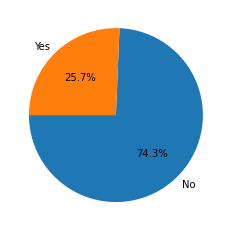

In [93]:
y=Onl_deli['Has Online delivery']
mylabels =Aggregate_rating['Count of that rating']
plt.pie(Onl_deli['Has Online delivery'].value_counts()/9551*100, labels=Onl_deli['Has Online delivery'].value_counts().index, autopct='%1.1f%%', startangle=180);
#plt.pie(y, labels = mylabels,radius=12, autopct='%1.0f%%')
plt.show() 

### Q1: From which Locality maximum hotels are listed in Zomato  

In [109]:
zomdf['City']=='Delhi'#.value_counts()
Delhi=zomdf.loc[zomdf['City'] == 'New Delhi']
print(Delhi['Locality'].value_counts())


Connaught Place           122
Rajouri Garden             99
Shahdara                   87
Defence Colony             86
Pitampura                  85
                         ... 
Dr. Zakir Hussain Marg      1
Kashmiri Gate               1
Durga Puri                  1
Race Course                 1
JW Marriott New Delhi       1
Name: Locality, Length: 254, dtype: int64


Connaught Place        122
Rajouri Garden          99
Shahdara                87
Defence Colony          86
Pitampura               85
Malviya Nagar           84
Mayur Vihar Phase 1     84
Rajinder Nagar          81
Safdarjung              80
Satyaniketan            79
Name: Locality, dtype: int64


<AxesSubplot:>

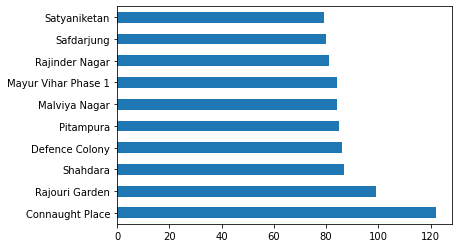

In [128]:
Delhi
#names=Delhi['Locality']
Number=Delhi['Locality'].value_counts().head(10)
print(Number)
Number.plot.barh()

In [129]:
import seaborn as sns

### What kind of Cuisine do these highly-rated restaurants offer

In [134]:
zomdf.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [136]:
zomdf.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [146]:
zomdf['Aggregate rating']>=4.7
top_restaurants=zomdf.loc[zomdf['Aggregate rating'] >= 4.9]
top_restaurants

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
8,6300010,Spiral - Sofitel Philippine Plaza Manila,162,Pasay City,"Plaza Level, Sofitel Philippine Plaza Manila, ...","Sofitel Philippine Plaza Manila, Pasay City","Sofitel Philippine Plaza Manila, Pasay City, P...",120.980090,14.552990,"European, Asian, Indian",...,Yes,No,No,No,4,4.9,Dark Green,Excellent,621,Phillipines
10,6309903,Silantro Fil-Mex,162,Pasig City,"75 East Capitol Drive, Kapitolyo, Pasig City",Kapitolyo,"Kapitolyo, Pasig City",121.057916,14.567689,"Filipino, Mexican",...,No,No,No,No,3,4.9,Dark Green,Excellent,1070,Phillipines
39,6600427,Coco Bambu,30,Bras�_lia,"SCES, Trecho 2, Conjunto 13/36, Setor de Clube...",Setor De Clubes Esportivos Sul,"Setor De Clubes Esportivos Sul, Bras�_lia",-47.868500,-15.819000,International,...,No,No,No,No,4,4.9,Dark Green,Excellent,30,Brazil
48,7300955,Braseiro da G��vea,30,Rio de Janeiro,"Pra�_a Santos Dumont, 116, G��vea, Rio de Janeiro",G��vea,"G��vea, Rio de Janeiro",-43.227042,-22.973507,"Brazilian, Bar Food",...,No,No,No,No,4,4.9,Dark Green,Excellent,40,Brazil
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9484,75989,Restaurant Mosaic @ The Orient,189,Pretoria,"The Orient Boutique Hotel, Crocodile River Val...",West Park,"West Park, Pretoria",27.999097,-25.761238,French,...,No,No,No,No,4,4.9,Dark Green,Excellent,85,South Africa
9514,5800176,Ministry of Crab,191,Colombo,"Old Colombo Dutch Hospital, Fort, Colombo 01","Old Dutch Hospital, Fort","Old Dutch Hospital, Fort, Colombo",79.844239,6.932814,Seafood,...,No,No,No,No,4,4.9,Dark Green,Excellent,203,Sri Lanka
9524,6004011,Gaga Manjero,208,Ankara,"Gazi Osman Pa��a Mahallesi, Filistin Caddesi, ...",Gazi Osman Pa��a,"Gazi Osman Pa��a, Ankara",32.869800,39.898239,World Cuisine,...,No,No,No,No,3,4.9,Dark Green,Excellent,95,Turkey
9538,5901782,Starbucks,208,��stanbul,"Bebek Mahallesi, Cevdetpa��a Caddesi, No 30/A,...",Bebek,"Bebek, ��stanbul",29.043734,41.077696,Cafe,...,No,No,No,No,2,4.9,Dark Green,Excellent,1042,Turkey


In [178]:
c1=top_restaurants['Restaurant Name']
c2=top_restaurants['Cuisines']
top_res=pd.merge(left=c1,right=c2,left_index=True, right_index=True)
top_res['Cuisines'].value_counts().reset_index()
top_res
cuisines=[]
for i in top_res['Cuisines']:
    cuisines.append(i)
cuisines2=[]
for k in cuisines:
    y=k.split(',')
    cuisines2.append(y)
print(cuisines)
print(cuisines2)   

['Japanese, Sushi', 'European, Asian, Indian', 'Filipino, Mexican', 'International', 'Brazilian, Bar Food', 'Brazilian, Bar Food', 'American, Caribbean, Seafood', 'Burger', 'BBQ, Breakfast, Southern', 'Asian', 'American, Coffee and Tea', 'Sandwich, Seafood, Cajun', 'Pizza, Sandwich', 'American, Sandwich, Tea', 'American, BBQ, Sandwich', 'Burger, Bar Food, Steak', 'Hawaiian, Seafood', 'Japanese', 'Italian, Deli', 'European, German', 'Indian, North Indian', 'Continental, Indian', 'Indian', 'Indian', 'Cafe, North Indian, Chinese', 'Fast Food', 'North Indian, European, Mediterranean', 'Bakery, Desserts', 'North Indian', 'Mexican, American, Healthy Food', 'North Indian', 'European, Mediterranean, North Indian', 'European, Mediterranean, North Indian', 'Italian, Bakery, Continental', 'North Indian, Chinese', 'North Indian, Chinese', 'Mughlai, Lucknowi', 'North Indian, South Indian, Mughlai', 'North Indian, European, Mediterranean', 'Ice Cream', 'Modern Indian', 'Modern Indian', 'North Indian

### How many of such restaurants accept online delivery

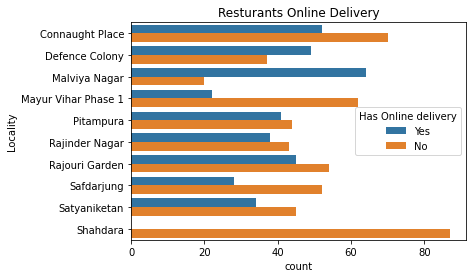

In [194]:
# zomdf['City']=='Delhi'#.value_counts()
# Delhi=zomdf.loc[zomdf['City'] == 'New Delhi']
# print(Delhi['Has Online delivery'].value_counts())
top_locality = Delhi.Locality.value_counts().head(10)
ax = sns.countplot(y= "Locality", hue="Has Online delivery", data=Delhi[Delhi.Locality.isin(top_locality.index)])
plt.title('Resturants Online Delivery');